In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
engine= create_engine("sqlite:///C:\\Users\\Banni\\Desktop\Class Files\\sqlalchemy-challenge\\Starter_Code\\Resources\\hawaii.sqlite")

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
session = Session(engine)

In [14]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date = datetime.strptime(latest_date, "%Y-%m-%d")


In [15]:
one_year_ago = latest_date - timedelta(days=365)

In [16]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

In [17]:
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

In [18]:
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'])
precipitation_df = precipitation_df.sort_values(by='Date')

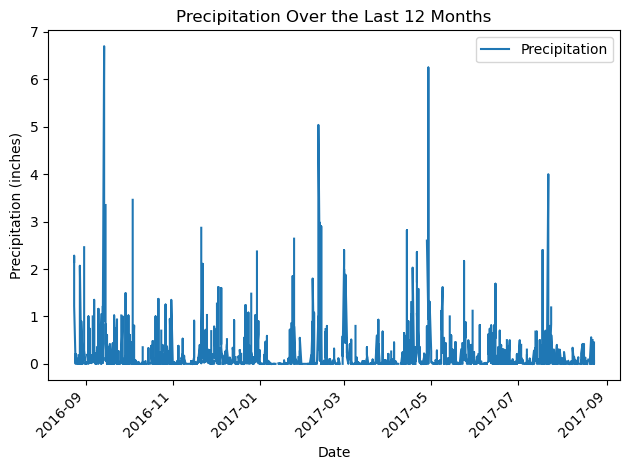

In [19]:
precipitation_df.plot(x='Date', y='Precipitation', title='Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print(precipitation_df.describe())

                                Date  Precipitation
count                           2223    2015.000000
mean   2017-02-16 18:54:53.927125248       0.176462
min              2016-08-24 00:00:00       0.000000
25%              2016-11-19 00:00:00       0.000000
50%              2017-02-15 00:00:00       0.020000
75%              2017-05-17 00:00:00       0.130000
max              2017-08-23 00:00:00       6.700000
std                              NaN       0.460288


In [21]:
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [22]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print("Most-active stations:")
for station in most_active_stations:
    print(f"Station ID: {station[0]}, Observation Count: {station[1]}")


Most-active stations:
Station ID: USC00519281, Observation Count: 2772
Station ID: USC00519397, Observation Count: 2724
Station ID: USC00513117, Observation Count: 2709
Station ID: USC00519523, Observation Count: 2669
Station ID: USC00516128, Observation Count: 2612
Station ID: USC00514830, Observation Count: 2202
Station ID: USC00511918, Observation Count: 1979
Station ID: USC00517948, Observation Count: 1372
Station ID: USC00518838, Observation Count: 511


In [23]:
most_active_station_id = most_active_stations[0][0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

print(f"Temperature statistics for most-active station (Station ID: {most_active_station_id}):")
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][1]}")
print(f"Average Temperature: {temperature_stats[0][2]}")


Temperature statistics for most-active station (Station ID: USC00519281):
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [24]:
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()


In [25]:
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'TOBS'])

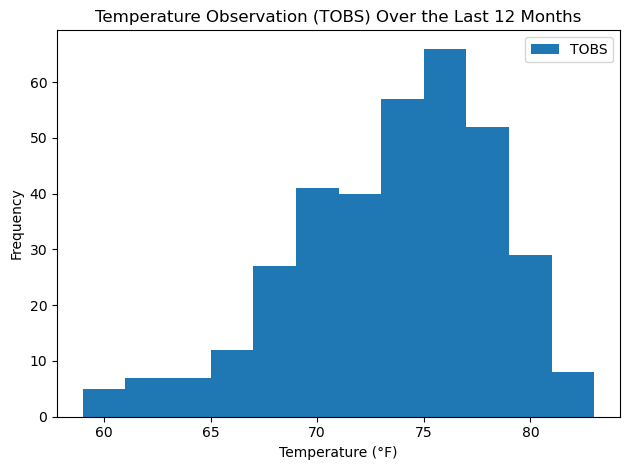

In [26]:
tobs_df.plot.hist(bins=12, title='Temperature Observation (TOBS) Over the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [27]:
session.close()